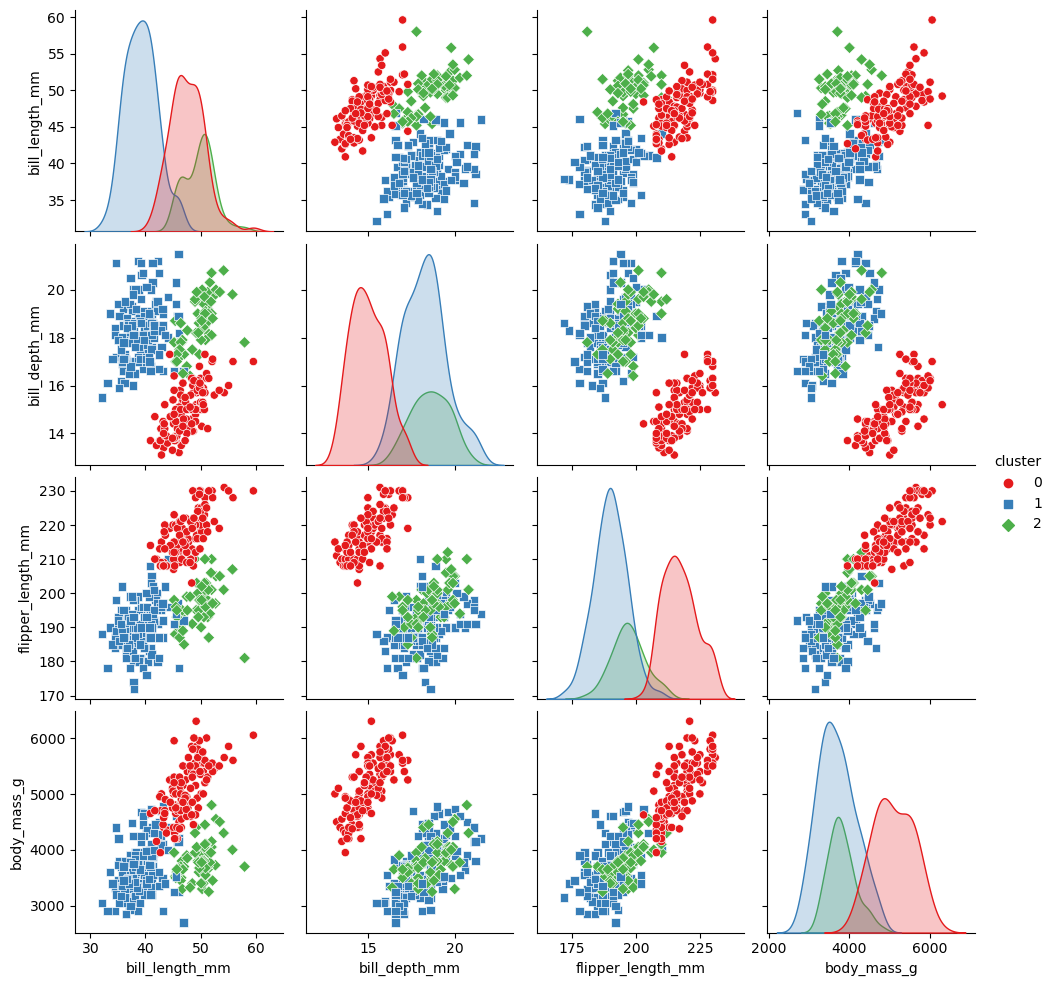

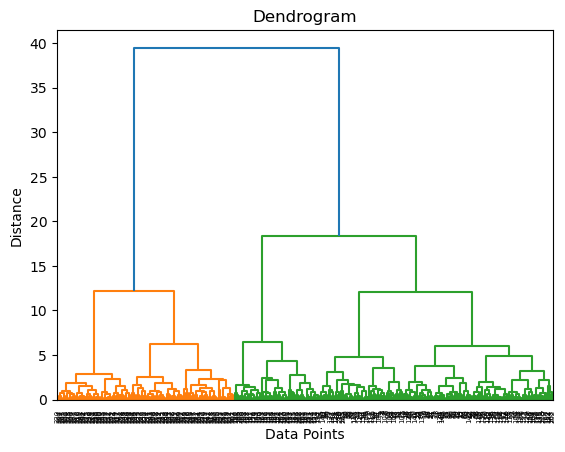

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the penguins dataset (you can obtain it from seaborn)
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

# Select features for clustering
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = penguins[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
penguins["cluster"] = agg_clusters

# Visualize the clustering results
sns.pairplot(penguins, hue="cluster", palette="Set1", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

# Create a dendrogram to visualize the hierarchical clustering process
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
